In [1]:
##Loading data
import os
os.environ["PTB_FOLDER_PATH"] = "/home/jupyter/data/files/ptbdb/1.0.0/"
import sys
sys.path.insert(0,"/home/jupyter/Cappy/ptd_data_handler")
sys.path.insert(0,"/home/jupyter/Cappy/signal_processing")
from ptb_data_formatter import *
from feature_extraction import *
from custom_processing import *
all_patient_data = get_formatted_ptb_data()
from ptb_xl_data_formatter import *
os.environ["PTB_XL_FOLDER_PATH"] = "/home/jupyter/data/physionet.org/files/ptb-xl/1.0.1"
#all_patient_data = get_formatted_ptb_xl_data()

In [2]:
np.random.seed(42)

In [3]:
np.random.seed(42)

In [4]:
# Create individual df for each class
mi_df = pd.DataFrame()
norm_df = pd.DataFrame()
non_mi_df = pd.DataFrame()

for recording in all_patient_data.keys():
    label = all_patient_data[recording]["diagnostic_class"][0]
    signal = all_patient_data[recording]["i"]
    patient = str.split(recording, "_")[0]
    # Clean Signal
    signal = clean_ecg_signal(signal, old_fs=1000)
    signal = pd.DataFrame(signal)
    if label == "mi":
        mi_df[recording] = signal
    elif label == "norm":
        norm_df[recording] = signal
    elif label == "non_mi":
        non_mi_df[recording] = signal
del(all_patient_data)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  


In [5]:
norm_df

,patient185_ecg_id_1,patient267_ecg_id_1,patient121_ecg_id_1,patient263_ecg_id_1,patient238_ecg_id_1,patient279_ecg_id_1,patient279_ecg_id_2,patient279_ecg_id_3,patient279_ecg_id_4,patient234_ecg_id_1,...,patient233_ecg_id_2,patient233_ecg_id_3,patient233_ecg_id_4,patient233_ecg_id_5,patient165_ecg_id_1,patient165_ecg_id_2,patient264_ecg_id_1,patient244_ecg_id_1,patient229_ecg_id_1,patient229_ecg_id_2
0,-0.007450,0.005031,0.037768,-0.012698,-0.003831,0.000582,-0.022679,-0.035559,0.000097,0.001611,...,-0.000055,-0.010495,0.002087,0.007778,0.029878,-0.011426,0.017532,0.001139,0.013193,0.002479
1,0.043165,0.088465,0.057059,-0.032886,-0.229358,-0.038666,-0.093237,-0.024130,0.038614,0.146267,...,0.597233,0.030002,-0.051864,0.032780,0.066230,-0.017216,0.154881,-0.039311,0.008839,0.046535
2,0.080236,0.150003,0.071064,-0.047486,-0.395609,-0.067484,-0.145026,-0.015832,0.066625,0.253603,...,1.042300,0.059639,-0.091185,0.050581,0.094230,-0.021417,0.256113,-0.068602,0.006328,0.078319
3,0.099562,0.182171,0.078035,-0.054889,-0.482828,-0.082474,-0.171834,-0.011576,0.080912,0.310900,...,1.283684,0.074972,-0.111128,0.059188,0.111265,-0.023543,0.308898,-0.083170,0.006143,0.094148
4,0.105197,0.190282,0.079143,-0.056694,-0.506331,-0.086365,-0.178579,-0.010441,0.084384,0.327250,...,1.359143,0.078983,-0.115605,0.061137,0.119572,-0.024006,0.322213,-0.086202,0.007599,0.097510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52895,0.035602,-0.017947,-0.004979,-0.021060,-0.000489,-0.036444,0.106852,0.138505,-0.001177,-0.006627,...,-0.008847,-0.004883,0.006891,-0.008818,-0.011407,-0.010202,0.010555,-0.023214,-0.003583,-0.009098
52896,0.034945,-0.018373,-0.003738,-0.021137,-0.000258,-0.036261,0.109367,0.141661,-0.001204,-0.006445,...,-0.010356,-0.005186,0.002046,-0.008992,-0.008722,-0.009524,0.013116,-0.020401,-0.002056,-0.009327
52897,0.031234,-0.018709,-0.003474,-0.021268,-0.000083,-0.036018,0.111198,0.143984,-0.001225,-0.006296,...,-0.011608,-0.005330,-0.001735,-0.009153,-0.007986,-0.008640,0.015185,-0.017782,-0.000881,-0.009265
52898,0.023500,-0.018914,-0.004439,-0.021401,0.000001,-0.035744,0.111933,0.145000,-0.001237,-0.006207,...,-0.012496,-0.005337,-0.004843,-0.009284,-0.010030,-0.007687,0.016413,-0.015572,-0.000955,-0.008819


In [6]:
mi_df

,patient078_ecg_id_1,patient078_ecg_id_2,patient078_ecg_id_3,patient078_ecg_id_4,patient041_ecg_id_1,patient041_ecg_id_2,patient041_ecg_id_3,patient041_ecg_id_4,patient021_ecg_id_1,patient021_ecg_id_2,...,patient047_ecg_id_2,patient047_ecg_id_3,patient027_ecg_id_1,patient027_ecg_id_2,patient027_ecg_id_3,patient072_ecg_id_1,patient072_ecg_id_2,patient072_ecg_id_3,patient072_ecg_id_4,patient138_ecg_id_1
0,-0.001367,0.001347,0.167053,-0.015405,0.002314,-0.000270,0.004395,-0.013669,-0.009918,0.017418,...,-0.071345,-0.019335,-0.005744,0.002388,-0.000776,-0.005364,-0.075567,0.002609,0.005031,0.033117
1,-0.396121,0.367616,0.443488,-0.113500,0.006800,-0.378008,0.027220,-0.136785,-0.416515,-0.206214,...,-0.850875,-0.404604,0.148061,-0.011908,0.522592,-0.022838,-0.283758,-0.068592,0.107534,-0.034713
2,-0.688576,0.640109,0.657799,-0.184503,0.010505,-0.659299,0.044159,-0.227525,-0.718190,-0.372032,...,-1.428538,-0.692384,0.262083,-0.022513,0.912111,-0.035211,-0.439632,-0.121969,0.184012,-0.083987
3,-0.844070,0.786496,0.791232,-0.219922,0.013017,-0.811289,0.052832,-0.274995,-0.879316,-0.459632,...,-1.736524,-0.848183,0.322916,-0.028229,1.122585,-0.041183,-0.525988,-0.151336,0.226355,-0.108950
4,-0.888831,0.829139,0.862578,-0.227485,0.014207,-0.857977,0.054020,-0.287510,-0.926220,-0.482640,...,-1.826680,-0.895127,0.340546,-0.029993,1.187435,-0.042612,-0.556929,-0.160720,0.241977,-0.114484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52895,-0.288084,0.247288,0.183804,-0.335751,0.010313,-0.311554,0.005335,-0.095738,-0.305761,-0.129224,...,-0.614622,0.269553,0.159805,-0.018753,0.393444,-0.013504,-0.145492,-0.068457,0.050241,NaN
52896,-0.284588,0.240636,0.180866,-0.313842,0.010109,-0.303657,0.006156,-0.094276,-0.299468,-0.130587,...,-0.602963,0.225267,0.154473,-0.018030,0.383263,-0.013274,-0.144311,-0.067890,0.051321,NaN
52897,-0.255015,0.214654,0.161439,-0.279351,0.009623,-0.272240,0.005666,-0.085222,-0.268333,-0.119286,...,-0.538925,0.221099,0.137065,-0.016536,0.341494,-0.011993,-0.130491,-0.061892,0.045905,NaN
52898,-0.191358,0.162820,0.120678,-0.231621,0.008590,-0.210147,0.003250,-0.065942,-0.204399,-0.090234,...,-0.407748,0.259865,0.104707,-0.013949,0.258728,-0.009333,-0.099524,-0.047996,0.031592,NaN


In [7]:
non_mi_df

,patient225_ecg_id_1,patient213_ecg_id_1,patient130_ecg_id_1,patient262_ecg_id_1,patient107_ecg_id_1,patient137_ecg_id_1,patient127_ecg_id_1,patient127_ecg_id_2,patient208_ecg_id_1,patient208_ecg_id_2,...,patient123_ecg_id_1,patient112_ecg_id_1,patient249_ecg_id_1,patient129_ecg_id_1,patient227_ecg_id_1,patient109_ecg_id_1,patient288_ecg_id_1,patient204_ecg_id_1,patient220_ecg_id_1,patient212_ecg_id_1
0,0.262099,0.001427,0.012432,-0.000756,-0.016503,0.017021,-0.018045,-0.005186,-0.117496,-0.011777,...,-0.005050,0.007638,0.002645,-0.016483,-0.072202,0.034259,-0.078795,-0.092974,0.043715,0.031630
1,-0.201862,-0.022774,0.021812,-0.313420,-0.100816,0.002359,-0.017916,0.070075,-1.120747,-0.325996,...,-0.297895,-0.010834,-0.244609,0.075718,-0.204071,-0.034832,0.229261,0.379478,0.091898,0.188211
2,-0.548644,-0.040036,0.029416,-0.545936,-0.162436,-0.008316,-0.017929,0.125041,-1.867005,-0.558999,...,-0.514450,-0.023906,-0.426830,0.143361,-0.303493,-0.085654,0.456584,0.730879,0.131904,0.300958
3,-0.736123,-0.048083,0.034666,-0.671295,-0.194125,-0.013986,-0.017837,0.153319,-2.269466,-0.682996,...,-0.629251,-0.029681,-0.522136,0.178234,-0.359756,-0.112629,0.576037,0.922066,0.160808,0.355972
4,-0.790588,-0.049211,0.037322,-0.709743,-0.202123,-0.015989,-0.017297,0.160418,-2.393251,-0.718144,...,-0.660680,-0.029700,-0.547239,0.186470,-0.380645,-0.120714,0.607942,0.985533,0.180496,0.365052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55195,-0.962749,-0.031819,NaN,-0.271702,NaN,NaN,NaN,NaN,NaN,-0.250184,...,NaN,NaN,-0.169155,NaN,-0.600510,NaN,0.233914,0.364954,0.019903,0.117752
55196,-0.895897,-0.031549,NaN,-0.263272,NaN,NaN,NaN,NaN,NaN,-0.242759,...,NaN,NaN,-0.166734,NaN,-0.554531,NaN,0.229309,0.354580,0.020810,0.118202
55197,-0.803632,-0.029010,NaN,-0.235315,NaN,NaN,NaN,NaN,NaN,-0.215372,...,NaN,NaN,-0.149737,NaN,-0.509344,NaN,0.205305,0.315396,0.020426,0.108022
55198,-0.678080,-0.022828,NaN,-0.182280,NaN,NaN,NaN,NaN,NaN,-0.163050,...,NaN,NaN,-0.113363,NaN,-0.459620,NaN,0.155478,0.238910,0.017367,0.082288


In [8]:
# Delete any column in which any reading is NaN
norm_df = norm_df.dropna(axis=1)
mi_df = mi_df.dropna(axis=1)
non_mi_df = non_mi_df.dropna(axis=1)

In [9]:
norm_df

,patient185_ecg_id_1,patient267_ecg_id_1,patient121_ecg_id_1,patient263_ecg_id_1,patient238_ecg_id_1,patient279_ecg_id_1,patient279_ecg_id_2,patient279_ecg_id_3,patient279_ecg_id_4,patient234_ecg_id_1,...,patient233_ecg_id_2,patient233_ecg_id_3,patient233_ecg_id_4,patient233_ecg_id_5,patient165_ecg_id_1,patient165_ecg_id_2,patient264_ecg_id_1,patient244_ecg_id_1,patient229_ecg_id_1,patient229_ecg_id_2
0,-0.007450,0.005031,0.037768,-0.012698,-0.003831,0.000582,-0.022679,-0.035559,0.000097,0.001611,...,-0.000055,-0.010495,0.002087,0.007778,0.029878,-0.011426,0.017532,0.001139,0.013193,0.002479
1,0.043165,0.088465,0.057059,-0.032886,-0.229358,-0.038666,-0.093237,-0.024130,0.038614,0.146267,...,0.597233,0.030002,-0.051864,0.032780,0.066230,-0.017216,0.154881,-0.039311,0.008839,0.046535
2,0.080236,0.150003,0.071064,-0.047486,-0.395609,-0.067484,-0.145026,-0.015832,0.066625,0.253603,...,1.042300,0.059639,-0.091185,0.050581,0.094230,-0.021417,0.256113,-0.068602,0.006328,0.078319
3,0.099562,0.182171,0.078035,-0.054889,-0.482828,-0.082474,-0.171834,-0.011576,0.080912,0.310900,...,1.283684,0.074972,-0.111128,0.059188,0.111265,-0.023543,0.308898,-0.083170,0.006143,0.094148
4,0.105197,0.190282,0.079143,-0.056694,-0.506331,-0.086365,-0.178579,-0.010441,0.084384,0.327250,...,1.359143,0.078983,-0.115605,0.061137,0.119572,-0.024006,0.322213,-0.086202,0.007599,0.097510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52895,0.035602,-0.017947,-0.004979,-0.021060,-0.000489,-0.036444,0.106852,0.138505,-0.001177,-0.006627,...,-0.008847,-0.004883,0.006891,-0.008818,-0.011407,-0.010202,0.010555,-0.023214,-0.003583,-0.009098
52896,0.034945,-0.018373,-0.003738,-0.021137,-0.000258,-0.036261,0.109367,0.141661,-0.001204,-0.006445,...,-0.010356,-0.005186,0.002046,-0.008992,-0.008722,-0.009524,0.013116,-0.020401,-0.002056,-0.009327
52897,0.031234,-0.018709,-0.003474,-0.021268,-0.000083,-0.036018,0.111198,0.143984,-0.001225,-0.006296,...,-0.011608,-0.005330,-0.001735,-0.009153,-0.007986,-0.008640,0.015185,-0.017782,-0.000881,-0.009265
52898,0.023500,-0.018914,-0.004439,-0.021401,0.000001,-0.035744,0.111933,0.145000,-0.001237,-0.006207,...,-0.012496,-0.005337,-0.004843,-0.009284,-0.010030,-0.007687,0.016413,-0.015572,-0.000955,-0.008819


In [10]:
mi_df

,patient078_ecg_id_1,patient078_ecg_id_2,patient078_ecg_id_3,patient078_ecg_id_4,patient041_ecg_id_1,patient041_ecg_id_2,patient041_ecg_id_3,patient041_ecg_id_4,patient021_ecg_id_1,patient021_ecg_id_2,...,patient047_ecg_id_1,patient047_ecg_id_2,patient047_ecg_id_3,patient027_ecg_id_1,patient027_ecg_id_2,patient027_ecg_id_3,patient072_ecg_id_1,patient072_ecg_id_2,patient072_ecg_id_3,patient072_ecg_id_4
0,-0.001367,0.001347,0.167053,-0.015405,0.002314,-0.000270,0.004395,-0.013669,-0.009918,0.017418,...,-0.036392,-0.071345,-0.019335,-0.005744,0.002388,-0.000776,-0.005364,-0.075567,0.002609,0.005031
1,-0.396121,0.367616,0.443488,-0.113500,0.006800,-0.378008,0.027220,-0.136785,-0.416515,-0.206214,...,-0.513773,-0.850875,-0.404604,0.148061,-0.011908,0.522592,-0.022838,-0.283758,-0.068592,0.107534
2,-0.688576,0.640109,0.657799,-0.184503,0.010505,-0.659299,0.044159,-0.227525,-0.718190,-0.372032,...,-0.868191,-1.428538,-0.692384,0.262083,-0.022513,0.912111,-0.035211,-0.439632,-0.121969,0.184012
3,-0.844070,0.786496,0.791232,-0.219922,0.013017,-0.811289,0.052832,-0.274995,-0.879316,-0.459632,...,-1.058611,-1.736524,-0.848183,0.322916,-0.028229,1.122585,-0.041183,-0.525988,-0.151336,0.226355
4,-0.888831,0.829139,0.862578,-0.227485,0.014207,-0.857977,0.054020,-0.287510,-0.926220,-0.482640,...,-1.116900,-1.826680,-0.895127,0.340546,-0.029993,1.187435,-0.042612,-0.556929,-0.160720,0.241977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52895,-0.288084,0.247288,0.183804,-0.335751,0.010313,-0.311554,0.005335,-0.095738,-0.305761,-0.129224,...,-0.360120,-0.614622,0.269553,0.159805,-0.018753,0.393444,-0.013504,-0.145492,-0.068457,0.050241
52896,-0.284588,0.240636,0.180866,-0.313842,0.010109,-0.303657,0.006156,-0.094276,-0.299468,-0.130587,...,-0.353285,-0.602963,0.225267,0.154473,-0.018030,0.383263,-0.013274,-0.144311,-0.067890,0.051321
52897,-0.255015,0.214654,0.161439,-0.279351,0.009623,-0.272240,0.005666,-0.085222,-0.268333,-0.119286,...,-0.316438,-0.538925,0.221099,0.137065,-0.016536,0.341494,-0.011993,-0.130491,-0.061892,0.045905
52898,-0.191358,0.162820,0.120678,-0.231621,0.008590,-0.210147,0.003250,-0.065942,-0.204399,-0.090234,...,-0.239885,-0.407748,0.259865,0.104707,-0.013949,0.258728,-0.009333,-0.099524,-0.047996,0.031592


In [11]:
non_mi_df

,patient225_ecg_id_1,patient213_ecg_id_1,patient262_ecg_id_1,patient208_ecg_id_2,patient286_ecg_id_1,patient201_ecg_id_1,patient201_ecg_id_2,patient219_ecg_id_1,patient216_ecg_id_1,patient203_ecg_id_1,...,patient271_ecg_id_1,patient221_ecg_id_1,patient218_ecg_id_1,patient258_ecg_id_1,patient249_ecg_id_1,patient227_ecg_id_1,patient288_ecg_id_1,patient204_ecg_id_1,patient220_ecg_id_1,patient212_ecg_id_1
0,0.262099,0.001427,-0.000756,-0.011777,0.000548,0.002948,-0.042273,0.330357,-0.012903,-0.013402,...,-0.006748,0.004921,-0.015443,0.014242,0.002645,-0.072202,-0.078795,-0.092974,0.043715,0.031630
1,-0.201862,-0.022774,-0.313420,-0.325996,0.116001,-0.000804,-0.099101,0.526734,-0.093872,0.089311,...,-0.352814,0.005569,-0.630274,-0.025708,-0.244609,-0.204071,0.229261,0.379478,0.091898,0.188211
2,-0.548644,-0.040036,-0.545936,-0.558999,0.201350,-0.003278,-0.136885,0.679951,-0.152219,0.165086,...,-0.609755,0.006241,-1.088629,-0.054171,-0.426830,-0.303493,0.456584,0.730879,0.131904,0.300958
3,-0.736123,-0.048083,-0.671295,-0.682996,0.246401,-0.003682,-0.149826,0.773398,-0.180899,0.204838,...,-0.747418,0.006917,-1.337850,-0.068089,-0.522136,-0.359756,0.576037,0.922066,0.160808,0.355972
4,-0.790588,-0.049211,-0.709743,-0.718144,0.258741,-0.001931,-0.144021,0.815360,-0.186552,0.215252,...,-0.788247,0.007337,-1.417754,-0.071428,-0.547239,-0.380645,0.607942,0.985533,0.180496,0.365052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55195,-0.962749,-0.031819,-0.271702,-0.250184,0.077004,0.399205,-0.052436,0.087809,-0.119744,0.056058,...,-0.264375,0.002473,-0.504058,-0.073128,-0.169155,-0.600510,0.233914,0.364954,0.019903,0.117752
55196,-0.895897,-0.031549,-0.263272,-0.242759,0.075830,0.365531,-0.052194,0.087171,-0.115686,0.057032,...,-0.257745,0.001493,-0.490128,-0.069726,-0.166734,-0.554531,0.229309,0.354580,0.020810,0.118202
55197,-0.803632,-0.029010,-0.235315,-0.215372,0.068089,0.294555,-0.047038,0.079148,-0.109130,0.052382,...,-0.229586,0.001344,-0.437047,-0.062793,-0.149737,-0.509344,0.205305,0.315396,0.020426,0.108022
55198,-0.678080,-0.022828,-0.182280,-0.163050,0.051473,0.193099,-0.035573,0.061287,-0.096531,0.039459,...,-0.173779,0.002017,-0.333971,-0.051192,-0.113363,-0.459620,0.155478,0.238910,0.017367,0.082288


In [12]:
# Shuffle the order of the ecg recordings
import random
norm_cols = norm_df.columns.to_list()
random.shuffle(norm_cols)
mi_cols = mi_df.columns.to_list()
random.shuffle(mi_cols)
non_mi_cols = non_mi_df.columns.to_list()
random.shuffle(non_mi_cols)
norm_df = norm_df[norm_cols]
mi_df = mi_df[mi_cols]
non_mi_df = non_mi_df[non_mi_cols]

In [13]:
print("Number of norm cases: ")
print(len(norm_df.columns))
print("Number of MI cases: ")
print(len(mi_df.columns))
print("Number of non_MI cases: ")
print(len(non_mi_df.columns))

Number of norm cases: 
79
Number of MI cases: 
349
Number of non_MI cases: 
39


In [14]:
beat_len = 512

mi_beats_df = pd.DataFrame()
for ecg in mi_df.columns:
    _mi_beats = []
    sig = mi_df[ecg].to_numpy()
    peaks = apply_pan_tompkins(sig, n_beats=False, standardize=True)
    for peak in peaks.keys():
        p = peaks[peak]
        _mi_beats.append(p)
        
    _mi_beats = np.array(_mi_beats)
    df = pd.DataFrame(np.reshape(_mi_beats, [-1,beat_len]))
    df['patient_id'] = str.split(ecg, "_")[0]
    mi_beats_df = pd.concat([mi_beats_df, df])
    
norm_beats_df = pd.DataFrame()
for ecg in norm_df.columns:
    _norm_beats = []
    sig = norm_df[ecg].to_numpy()
    peaks = apply_pan_tompkins(sig, n_beats=False, standardize=True)
    for peak in peaks.keys():
        p = peaks[peak]
        _norm_beats.append(p)
    
    _norm_beats = np.array(_norm_beats)
    df = pd.DataFrame(np.reshape(_norm_beats, [-1,beat_len]))
    df['patient_id'] = str.split(ecg, "_")[0]
    norm_beats_df = pd.concat([norm_beats_df, df])
        
non_mi_beats_df = pd.DataFrame()
for ecg in non_mi_df.columns:
    _non_mi_beats = []
    sig = non_mi_df[ecg].to_numpy()
    peaks = apply_pan_tompkins(sig, n_beats=False, standardize=True)
    for peak in peaks.keys():
        p = peaks[peak]
        _non_mi_beats.append(p)
   
    _non_mi_beats = np.array(_non_mi_beats)
    df = pd.DataFrame(np.reshape(_non_mi_beats, [-1,beat_len]))
    df['patient_id'] = str.split(ecg, "_")[0]
    non_mi_beats_df = pd.concat([non_mi_beats_df, df])

mi_beats_df['label'] = 0
norm_beats_df['label'] = 1
non_mi_beats_df['label'] = 2
    
print(mi_beats_df.shape)
print(norm_beats_df.shape)
print(non_mi_beats_df.shape)


(51022, 514)
(10086, 514)
(5505, 514)


In [15]:
mi_beats_df

,0,1,2,3,4,5,6,7,8,9,...,504,505,506,507,508,509,510,511,patient_id,label
0,0.986138,0.970977,0.905059,0.795428,0.660796,0.524366,0.404300,0.309167,0.239304,0.190509,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,patient033,0
1,0.966706,0.961210,0.906017,0.806050,0.678260,0.545452,0.426756,0.332033,0.262328,0.213556,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,patient033,0
2,0.941625,0.903752,0.817371,0.696445,0.563309,0.439251,0.336995,0.259786,0.205042,0.168059,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,patient033,0
3,0.914503,0.907057,0.849856,0.749207,0.623079,0.493817,0.378869,0.286434,0.217135,0.168069,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,patient033,0
4,0.948740,0.916190,0.836068,0.720767,0.591661,0.470175,0.370040,0.295311,0.243248,0.208412,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,patient033,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,0.989862,0.978446,0.951801,0.909322,0.852436,0.785026,0.712342,0.639896,0.573044,0.516714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,patient158,0
133,0.961503,0.949851,0.924235,0.885373,0.834954,0.775812,0.711642,0.646484,0.584452,0.529865,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,patient158,0
134,0.960522,0.957141,0.941148,0.911508,0.867885,0.811706,0.746329,0.676582,0.608309,0.547658,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,patient158,0
135,0.995969,0.988690,0.964730,0.922903,0.864352,0.792869,0.714315,0.635753,0.564452,0.506626,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,patient158,0


In [16]:
# Train/test split
def split_train_test(x, test_size=4):
    patients = np.unique(x["patient_id"])
    counter = 0
    x_train = pd.DataFrame()
    x_test = pd.DataFrame()
    for patient in np.unique(patients):
        #print(patient)
        if counter < test_size:
            x_train = pd.concat([x_train, x.loc[x["patient_id"]==patient]])
            counter = counter + 1
        else:
            x_test = pd.concat([x_test, x.loc[x["patient_id"]==patient]])
            counter = 0
    return x_train, x_test

mi_train_df, mi_test_df = split_train_test(mi_beats_df)
norm_train_df, norm_test_df = split_train_test(norm_beats_df)
non_mi_train_df, non_mi_test_df = split_train_test(non_mi_beats_df)

print(mi_train_df.shape, mi_test_df.shape)
print(norm_train_df.shape, norm_test_df.shape)
print(non_mi_train_df.shape, non_mi_test_df.shape)

(40581, 514) (10441, 514)
(8259, 514) (1827, 514)
(4317, 514) (1188, 514)


In [17]:
mi_weight = (1/mi_train_df.shape[0]) * ((mi_train_df.shape[0]+norm_train_df.shape[0]+non_mi_train_df.shape[0])/2) 
norm_weight = (1/norm_train_df.shape[0]) * ((mi_train_df.shape[0]+norm_train_df.shape[0]+non_mi_train_df.shape[0])/2) 
non_mi_weight = (1/non_mi_train_df.shape[0]) * ((mi_train_df.shape[0]+norm_train_df.shape[0]+non_mi_train_df.shape[0])/2)

weights = {0:mi_weight, 1:norm_weight, 2:non_mi_weight}
print(mi_weight, norm_weight, non_mi_weight)

0.654949360538183 3.218125681075191 6.156706045865184


In [18]:
# Balancing data
def balance_dataset(x, y, method):
    from imblearn.over_sampling import SMOTE
    if method == 'random':
        return
    if method == 'SMOTE':
        sm = SMOTE()
        x_res, y_res = sm.fit_resample(x, y)
        return x_res, y_res

mi_train_df_down = mi_train_df.sample(frac=0.5)[0:len(mi_train_df)]
norm_train_df_up = pd.concat([norm_train_df,norm_train_df.sample(frac=1)])
non_mi_train_df_up = pd.concat([non_mi_train_df, non_mi_train_df.sample(frac=1), non_mi_train_df.sample(frac=1)])

In [19]:
print(mi_train_df.shape, mi_test_df.shape)
print(norm_train_df_up.shape, norm_test_df.shape)
print(non_mi_train_df_up.shape, non_mi_test_df.shape)

(40581, 514) (10441, 514)
(16518, 514) (1827, 514)
(12951, 514) (1188, 514)


In [20]:
# Generate Tensors
def create_tensor(x, seq_length=8, step=1, shuffle=True):
    label = x["label"].to_numpy()[0]
    oh_label = [0,0,0]
    oh_label[label] = 1
    x_tensor = []
    y_tensor = []
    for patient in np.unique(x["patient_id"]):
        df = x.loc[x["patient_id"]==patient]
        df = df.drop(columns=["patient_id","label"])
        arr = df.to_numpy()
        for i in range(0,int(((np.shape(arr)[0]-seq_length)/step)+1),step):
            # shuffle order of sequence of beats here
            if shuffle:
                x_tensor.append(pd.DataFrame(arr[i:i+seq_length,:]).sample(frac=1).to_numpy())
                y_tensor.append(oh_label)
            else:
                x_tensor.append(pd.DataFrame(arr[i:i+seq_length,:]).to_numpy())
                y_tensor.append(oh_label)
    return x_tensor, y_tensor

x_mi_train, y_mi_train = create_tensor(mi_train_df)
x_mi_test, y_mi_test = create_tensor(mi_test_df)
x_norm_train, y_norm_train = create_tensor(norm_train_df)
x_norm_test, y_norm_test = create_tensor(norm_test_df)
x_non_mi_train, y_non_mi_train = create_tensor(non_mi_train_df)
x_non_mi_test, y_non_mi_test = create_tensor(non_mi_test_df)

print(np.shape(x_mi_train), np.shape(x_norm_train), np.shape(x_non_mi_train))

x_train = []
x_test = []
y_train = []
y_test = []
x_train = np.concatenate([x_mi_train, x_norm_train, x_non_mi_train], axis=0)
x_test = np.concatenate([x_mi_test, x_norm_test, x_non_mi_test], axis=0)
y_train = np.concatenate([y_mi_train, y_norm_train, y_non_mi_train], axis=0)
y_test = np.concatenate([y_mi_test, y_norm_test, y_non_mi_test], axis=0)

from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train, y_train)
x_test, y_test = shuffle(x_test, y_test)
print(np.shape(x_train), np.shape(y_train))
print(np.shape(x_test), np.shape(y_test))

(39825, 8, 512) (7965, 8, 512) (4107, 8, 512)
(51897, 8, 512) (51897, 3)
(13155, 8, 512) (13155, 3)


In [24]:
## ORIGINAL HYPERPARAMETERS FROM PAPER
import tensorflow as tf

seq_length = 8
beat_length = 512
num_feats = 1

## Layer 0 - input
input = tf.keras.Input(shape=(seq_length, beat_length, num_feats))

## Layers 1-6 - time-distributed convolutional block
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(32, 3, padding='same', activation='relu'))(input)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(32, 3, padding='same', activation='relu'))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPool1D(pool_size=2))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.5))(x)

## Layers 7-12 - time-distributed convolutional block
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(32, 3, padding='same', activation='relu'))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(32, 3, padding='same', activation='relu'))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPool1D(pool_size=2))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.5))(x)

## Layers 13-19 - time-distributed convolutional block
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(32, 3, padding='same', activation='relu'))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(32, 3, padding='same', activation='relu'))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPool1D(pool_size=2))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.5))(x)

## Layers 19-24 - time-distributed convolutional block
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(32, 3, padding='same', activation='relu'))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(32, 3, padding='same', activation='relu'))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPool1D(pool_size=2))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.5))(x)

## Layer 25 - time-distributed flatten
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Flatten())(x)

## Layer 26 - time-distributed dense
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(32, activation='relu'))(x)

## Layer 27 - time-distributed batch norm
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)

## Layer 28 - time-distributed dropout
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.5))(x)

## Layer 29 - LSTM
x = tf.keras.layers.LSTM(32)(x)

## Layer 30 - batch norm
x = tf.keras.layers.BatchNormalization()(x)

## Layer 31 - dropout
x = tf.keras.layers.Dropout(0.5)(x)

## Layer 32 - dense
x = tf.keras.layers.Dense(32, activation='relu')(x)

## Layer 33 - batch norm
x = tf.keras.layers.BatchNormalization()(x)

## Layer 34 - dropout
x = tf.keras.layers.Dropout(0.5)(x)

## Layer 35 - output
output = tf.keras.layers.Dense(3, activation='softmax')(x)

cnn_lstm_model = tf.keras.Model(input, output, name="cnn_lstm_model")
cnn_lstm_model.summary()

Model: "cnn_lstm_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 8, 512, 1)]       0         
                                                                 
 time_distributed_28 (TimeDi  (None, 8, 512, 32)       128       
 stributed)                                                      
                                                                 
 time_distributed_29 (TimeDi  (None, 8, 512, 32)       128       
 stributed)                                                      
                                                                 
 time_distributed_30 (TimeDi  (None, 8, 512, 32)       3104      
 stributed)                                                      
                                                                 
 time_distributed_31 (TimeDi  (None, 8, 512, 32)       128       
 stributed)                                         

In [25]:
cnn_lstm_model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-3), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=[tf.keras.metrics.CategoricalAccuracy()])



In [26]:
import datetime

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
path = ""
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=path,
    save_weights_only=False,
    monitor='val_loss',
    mode='max',
    save_best_only=True)


In [27]:
%load_ext tensorboard
%tensorboard --logdir logs

In [28]:
cnn_lstm_model.fit(x=x_train, y=y_train, validation_data=[x_test, y_test], batch_size=32, epochs=50, verbose=True, callbacks=[callback, tensorboard_callback, model_checkpoint_callback], class_weight=weights)

Epoch 1/50
1622/1622 [==============================] - ETA: 0s - loss: 1.6741 - categorical_accuracy: 0.4299

2022-02-23 02:36:20.755479: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: assets


INFO:tensorflow:Assets written to: assets


1622/1622 [==============================] - 691s 422ms/step - loss: 1.6741 - categorical_accuracy: 0.4299 - val_loss: 1.1939 - val_categorical_accuracy: 0.3088
Epoch 2/50
 135/1622 [=>............................] - ETA: 15:55 - loss: 1.0899 - categorical_accuracy: 0.5250

KeyboardInterrupt: 

In [77]:
curr_model = "conv_32_conv_filter_6_pool_size_4_dropout_0.6_dense_8_lstm_32_lr_0.01_opt_Adagrad_batch_size_512"
model = tf.keras.models.load_model("saved_models/cnn_lstm/" + curr_model)

In [78]:
y_test = (y_test).astype(int)
y_pred = model.predict(x_test)
y_pred = (y_pred == y_pred.max(axis=1)[:,None]).astype(int)

MI Sensitivity:  0.31437598736176936
MI Specificity:  0.8277166437414031


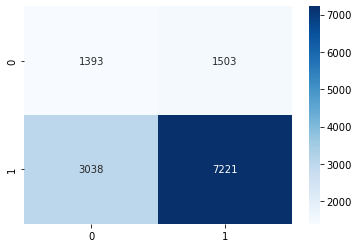

In [79]:
from sklearn.metrics import multilabel_confusion_matrix
import seaborn as sns
cf_matrix = multilabel_confusion_matrix(y_test, y_pred)
mi_sens = (cf_matrix[0][0][0])/(cf_matrix[0][0][0]+cf_matrix[0][1][0])
mi_spec = (cf_matrix[0][1][1])/(cf_matrix[0][1][1]+cf_matrix[0][0][1])
sns.heatmap(cf_matrix[0], annot=True, cmap="Blues", fmt='g')
print("MI Sensitivity: ", mi_sens)
print("MI Specificity: ", mi_spec)

Other CVD Sensitivity:  0.8705281090289608
Other CVD Specificity:  0.35269709543568467


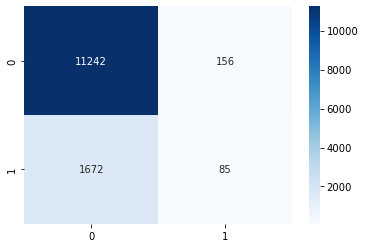

In [80]:
sns.heatmap(cf_matrix[1], annot=True, cmap="Blues", fmt='g')
non_mi_sens = (cf_matrix[1][0][0])/(cf_matrix[1][0][0]+cf_matrix[1][1][0])
non_mi_spec = (cf_matrix[1][1][1])/(cf_matrix[1][1][1]+cf_matrix[1][0][1])
print("Other CVD Sensitivity: ", non_mi_sens)
print("Other CVD Specificity: ", non_mi_spec)

Healthy Sensitivity:  0.9148912437255996
Healthy Specificity:  0.08973747016706445


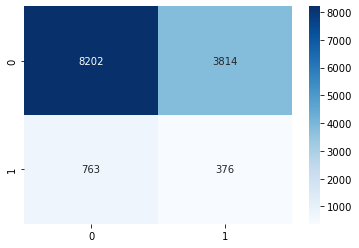

In [81]:
sns.heatmap(cf_matrix[2], annot=True, cmap="Blues", fmt='g')
norm_sens = (cf_matrix[2][0][0])/(cf_matrix[2][0][0]+cf_matrix[2][1][0])
norm_spec = (cf_matrix[2][1][1])/(cf_matrix[2][1][1]+cf_matrix[2][0][1])
print("Healthy Sensitivity: ", norm_sens)
print("Healthy Specificity: ", norm_spec)


Classification Report

              precision    recall  f1-score   support

          MI       0.83      0.70      0.76     10259
   Other CVD       0.35      0.05      0.09      1757
     Healthy       0.09      0.33      0.14      1139

   micro avg       0.58      0.58      0.58     13155
   macro avg       0.42      0.36      0.33     13155
weighted avg       0.70      0.58      0.62     13155
 samples avg       0.58      0.58      0.58     13155



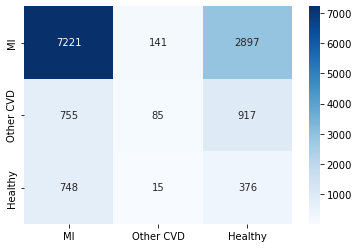

In [82]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt='g', xticklabels=['MI', 'Other CVD', 'Healthy'], yticklabels=['MI', 'Other CVD', 'Healthy'])
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['MI', 'Other CVD', 'Healthy']))

In [21]:
%load_ext tensorboard
%tensorboard --logdir logs

In [ ]:
## Random search over hyperparameter space
import random
import tensorflow as tf
import datetime
from sklearn.metrics import f1_score

conv_layers = [8,16,32]
conv_filters = [2,3,6]
pool_sizes = [2,3,4]
dropouts = [0.4,0.5,0.6]
denses = [8,16,32,64,128]
lstms = [16,32,64]
lrs = [1e-2, 1e-1] 
opts = ["Adam", "RMSProp", "Adagrad"]
batch_sizes = [32,64,128,256, 512]
best_model = ""
best_f1 = 0
model_df = pd.DataFrame(columns = ["model_name", "f1_score"])

for i in range(50):
    conv_layer = random.choice(conv_layers)
    conv_filter = random.choice(conv_filters)
    pool_size = random.choice(pool_sizes)
    dropout = random.choice(dropouts)
    dense = random.choice(denses)
    lstm = random.choice(lstms)
    lr = random.choice(lrs)
    opt = random.choice(opts)
    batch_size = random.choice(batch_sizes)
    
    model_name = "conv_" + str(conv_layer) + "_conv_filter_" + str(conv_filter) + "_pool_size_" + str(pool_size) + "_dropout_" + str(dropout) + "_dense_" + str(dense) + "_lstm_" + str(lstm) +  "_lr_" + str(lr) +  "_opt_" + str(opt) +  "_batch_size_" + str(batch_size)
    path = "saved_models/cnn_lstm/" + model_name
    
    seq_length = 8
    beat_length = 512
    num_feats = 1

    ## Layer 0 - input
    input = tf.keras.Input(shape=(seq_length, beat_length, num_feats))

    ## Layers 1-6 - time-distributed convolutional block
    x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(conv_layer, conv_filter, padding='same', activation='relu'))(input)
    x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
    x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(conv_layer, conv_filter, padding='same', activation='relu'))(x)
    x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
    x = tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPool1D(pool_size=pool_size))(x)
    x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(dropout))(x)

    ## Layers 7-12 - time-distributed convolutional block
    x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(conv_layer, conv_filter, padding='same', activation='relu'))(x)
    x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
    x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(conv_layer, conv_filter, padding='same', activation='relu'))(x)
    x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
    x = tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPool1D(pool_size=pool_size))(x)
    x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(dropout))(x)

    ## Layers 13-19 - time-distributed convolutional block
    x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(conv_layer, conv_filter, padding='same', activation='relu'))(x)
    x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
    x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(conv_layer, conv_filter, padding='same', activation='relu'))(x)
    x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
    x = tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPool1D(pool_size=pool_size))(x)
    x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(dropout))(x)

    ## Layers 19-24 - time-distributed convolutional block
    x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(conv_layer, conv_filter, padding='same', activation='relu'))(x)
    x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
    x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(conv_layer, conv_filter, padding='same', activation='relu'))(x)
    x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
    x = tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPool1D(pool_size=pool_size))(x)
    x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(dropout))(x)

    ## Layer 25 - time-distributed flatten
    x = tf.keras.layers.TimeDistributed(tf.keras.layers.Flatten())(x)

    ## Layer 26 - time-distributed dense
    x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(dense, activation='relu'))(x)

    ## Layer 27 - time-distributed batch norm
    x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)

    ## Layer 28 - time-distributed dropout
    x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(dropout))(x)

    ## Layer 29 - LSTM
    x = tf.keras.layers.LSTM(lstm)(x)

    ## Layer 30 - batch norm
    x = tf.keras.layers.BatchNormalization()(x)

    ## Layer 31 - dropout
    x = tf.keras.layers.Dropout(dropout)(x)

    ## Layer 32 - dense
    x = tf.keras.layers.Dense(dense, activation='relu')(x)

    ## Layer 33 - batch norm
    x = tf.keras.layers.BatchNormalization()(x)

    ## Layer 34 - dropout
    x = tf.keras.layers.Dropout(dropout)(x)

    ## Layer 35 - output
    output = tf.keras.layers.Dense(3, activation='softmax')(x)

    cnn_lstm_model_all = tf.keras.Model(input, output, name=model_name)
    #cnn_lstm_model_all.summary()
    
    if opt == "Adam":
        opt_ = tf.keras.optimizers.Adam(learning_rate=lr)
    elif opt == "SGD":
        opt_ = tf.keras.optimizers.SGD(learning_rate=lr)
    elif opt == "RMSProp":
        opt_ = tf.keras.optimizers.RMSprop(learning_rate=lr)
    elif opt == "Adagrad":
        opt_ = tf.keras.optimizers.Adagrad(learning_rate=lr)
    
    cnn_lstm_model_all.compile(optimizer=opt_, loss=tf.keras.losses.CategoricalCrossentropy(), metrics=[tf.keras.metrics.CategoricalAccuracy(), tf.keras.metrics.AUC(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
    callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
    logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
    model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        filepath=path,
        save_weights_only=False,
        monitor='val_loss',
        mode='max',
        save_best_only=True)
    
    print(" ----------------------- CURRENTLY TRAINING MODEL ------------------------- ")
    print(model_name)
    cnn_lstm_model_all.fit(x=x_train, y=y_train, validation_data=[x_test, y_test], batch_size=batch_size, epochs=100, verbose=True, callbacks=[callback, tensorboard_callback, model_checkpoint_callback], class_weight=weights)
    
    model_4_labels_pred = cnn_lstm_model_all.predict(x_test)
    model_4_labels_test_score = (y_test).astype(int)
    model_4_labels_pred_score = (model_4_labels_pred == model_4_labels_pred.max(axis=1)[:,None]).astype(int)
    f1 = f1_score(model_4_labels_test_score, model_4_labels_pred_score, average="macro")
    if f1 > best_f1:
        best_model = model_name
        best_f1 = f1
    print(" ----------------------- CURRENT BEST MODEL ------------------------- ")
    print(best_model)
    print("F1 SCORE: " + str(best_f1))
    to_add = [model_name,f1]
    model_df = model_df.append(pd.Series(to_add, index=["model_name","f1_score"]), ignore_index=True)
    model_df.to_csv("saved_models/cnn_lstm/training_results_3.csv")
    
    

2022-02-23 02:50:51.597616: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


 ----------------------- CURRENTLY TRAINING MODEL ------------------------- 
conv_8_conv_filter_3_pool_size_4_dropout_0.5_dense_128_lstm_16_lr_0.01_opt_RMSProp_batch_size_512
Epoch 1/100
102/102 [==============================] - ETA: 0s - loss: 1.7544 - categorical_accuracy: 0.3542 - auc: 0.5416 - precision: 0.4087 - recall: 0.1171

2022-02-23 02:53:37.525803: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_8_conv_filter_3_pool_size_4_dropout_0.5_dense_128_lstm_16_lr_0.01_opt_RMSProp_batch_size_512/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_8_conv_filter_3_pool_size_4_dropout_0.5_dense_128_lstm_16_lr_0.01_opt_RMSProp_batch_size_512/assets


102/102 [==============================] - 197s 2s/step - loss: 1.7544 - categorical_accuracy: 0.3542 - auc: 0.5416 - precision: 0.4087 - recall: 0.1171 - val_loss: 1.1695 - val_categorical_accuracy: 0.0940 - val_auc: 0.1619 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/100
102/102 [==============================] - ETA: 0s - loss: 1.5742 - categorical_accuracy: 0.4064 - auc: 0.6140 - precision: 0.5404 - recall: 0.1820

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_8_conv_filter_3_pool_size_4_dropout_0.5_dense_128_lstm_16_lr_0.01_opt_RMSProp_batch_size_512/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_8_conv_filter_3_pool_size_4_dropout_0.5_dense_128_lstm_16_lr_0.01_opt_RMSProp_batch_size_512/assets


102/102 [==============================] - 169s 2s/step - loss: 1.5742 - categorical_accuracy: 0.4064 - auc: 0.6140 - precision: 0.5404 - recall: 0.1820 - val_loss: 1.1996 - val_categorical_accuracy: 0.2433 - val_auc: 0.3954 - val_precision: 0.0378 - val_recall: 0.0068
Epoch 3/100
102/102 [==============================] - 118s 1s/step - loss: 1.4957 - categorical_accuracy: 0.4089 - auc: 0.6421 - precision: 0.5067 - recall: 0.2348 - val_loss: 1.1582 - val_categorical_accuracy: 0.3942 - val_auc: 0.5948 - val_precision: 0.6286 - val_recall: 0.2991
Epoch 4/100
102/102 [==============================] - 118s 1s/step - loss: 1.4150 - categorical_accuracy: 0.4046 - auc: 0.6580 - precision: 0.4719 - recall: 0.2685 - val_loss: 0.9575 - val_categorical_accuracy: 0.5799 - val_auc: 0.7617 - val_precision: 0.6010 - val_recall: 0.5690
Epoch 5/100
102/102 [==============================] - 102s 998ms/step - loss: 1.3383 - categorical_accuracy: 0.4423 - auc: 0.6920 - precision: 0.5147 - recall: 0.338

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_8_conv_filter_3_pool_size_4_dropout_0.5_dense_128_lstm_16_lr_0.01_opt_RMSProp_batch_size_512/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_8_conv_filter_3_pool_size_4_dropout_0.5_dense_128_lstm_16_lr_0.01_opt_RMSProp_batch_size_512/assets


102/102 [==============================] - 178s 2s/step - loss: 1.1612 - categorical_accuracy: 0.5275 - auc: 0.7593 - precision: 0.5517 - recall: 0.4618 - val_loss: 1.2890 - val_categorical_accuracy: 0.4342 - val_auc: 0.6558 - val_precision: 0.4347 - val_recall: 0.4244
Epoch 9/100
102/102 [==============================] - 119s 1s/step - loss: 1.1221 - categorical_accuracy: 0.5382 - auc: 0.7717 - precision: 0.5606 - recall: 0.4883 - val_loss: 1.2707 - val_categorical_accuracy: 0.2608 - val_auc: 0.5472 - val_precision: 0.2822 - val_recall: 0.2353
Epoch 10/100
102/102 [==============================] - 119s 1s/step - loss: 1.0915 - categorical_accuracy: 0.5448 - auc: 0.7785 - precision: 0.5658 - recall: 0.4997 - val_loss: 1.2618 - val_categorical_accuracy: 0.2328 - val_auc: 0.5645 - val_precision: 0.2235 - val_recall: 0.1810
Epoch 11/100
102/102 [==============================] - 117s 1s/step - loss: 1.0886 - categorical_accuracy: 0.5433 - auc: 0.7781 - precision: 0.5654 - recall: 0.4978

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_8_conv_filter_3_pool_size_3_dropout_0.6_dense_16_lstm_64_lr_0.01_opt_Adagrad_batch_size_256/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_8_conv_filter_3_pool_size_3_dropout_0.6_dense_16_lstm_64_lr_0.01_opt_Adagrad_batch_size_256/assets


203/203 [==============================] - 244s 1s/step - loss: 2.0070 - categorical_accuracy: 0.3523 - auc_1: 0.5251 - precision_1: 0.3611 - recall_1: 0.2001 - val_loss: 1.0909 - val_categorical_accuracy: 0.0866 - val_auc_1: 0.4756 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 2/100
203/203 [==============================] - ETA: 0s - loss: 1.7181 - categorical_accuracy: 0.3752 - auc_1: 0.5528 - precision_1: 0.4020 - recall_1: 0.1151

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_8_conv_filter_3_pool_size_3_dropout_0.6_dense_16_lstm_64_lr_0.01_opt_Adagrad_batch_size_256/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_8_conv_filter_3_pool_size_3_dropout_0.6_dense_16_lstm_64_lr_0.01_opt_Adagrad_batch_size_256/assets


203/203 [==============================] - 209s 1s/step - loss: 1.7181 - categorical_accuracy: 0.3752 - auc_1: 0.5528 - precision_1: 0.4020 - recall_1: 0.1151 - val_loss: 1.1363 - val_categorical_accuracy: 0.0866 - val_auc_1: 0.1413 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 3/100
203/203 [==============================] - 160s 786ms/step - loss: 1.6469 - categorical_accuracy: 0.3938 - auc_1: 0.5719 - precision_1: 0.4768 - recall_1: 0.0785 - val_loss: 1.1103 - val_categorical_accuracy: 0.0956 - val_auc_1: 0.4226 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 4/100
203/203 [==============================] - 158s 780ms/step - loss: 1.6221 - categorical_accuracy: 0.4135 - auc_1: 0.5868 - precision_1: 0.5589 - recall_1: 0.0675 - val_loss: 1.1024 - val_categorical_accuracy: 0.1803 - val_auc_1: 0.4706 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 5/100
203/203 [==============================] - 163s 803ms/step - loss: 1.6042 - categorical_

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_8_conv_filter_3_pool_size_3_dropout_0.6_dense_16_lstm_64_lr_0.01_opt_Adagrad_batch_size_256/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_8_conv_filter_3_pool_size_3_dropout_0.6_dense_16_lstm_64_lr_0.01_opt_Adagrad_batch_size_256/assets


203/203 [==============================] - 209s 1s/step - loss: 1.5789 - categorical_accuracy: 0.4702 - auc_1: 0.6216 - precision_1: 0.7359 - recall_1: 0.0872 - val_loss: 1.1485 - val_categorical_accuracy: 0.2355 - val_auc_1: 0.4043 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 10/100
203/203 [==============================] - ETA: 0s - loss: 1.5750 - categorical_accuracy: 0.4696 - auc_1: 0.6225 - precision_1: 0.7364 - recall_1: 0.0951

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_8_conv_filter_3_pool_size_3_dropout_0.6_dense_16_lstm_64_lr_0.01_opt_Adagrad_batch_size_256/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_8_conv_filter_3_pool_size_3_dropout_0.6_dense_16_lstm_64_lr_0.01_opt_Adagrad_batch_size_256/assets


203/203 [==============================] - 189s 932ms/step - loss: 1.5750 - categorical_accuracy: 0.4696 - auc_1: 0.6225 - precision_1: 0.7364 - recall_1: 0.0951 - val_loss: 1.1600 - val_categorical_accuracy: 0.2134 - val_auc_1: 0.3866 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 11/100
203/203 [==============================] - 163s 805ms/step - loss: 1.5732 - categorical_accuracy: 0.4813 - auc_1: 0.6307 - precision_1: 0.7249 - recall_1: 0.1021 - val_loss: 1.1502 - val_categorical_accuracy: 0.2450 - val_auc_1: 0.4187 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 00011: early stopping
 ----------------------- CURRENT BEST MODEL ------------------------- 
conv_8_conv_filter_3_pool_size_4_dropout_0.5_dense_128_lstm_16_lr_0.01_opt_RMSProp_batch_size_512
F1 SCORE: 0.3373560597697727
 ----------------------- CURRENTLY TRAINING MODEL ------------------------- 
conv_8_conv_filter_3_pool_size_3_dropout_0.5_dense_8_lstm_32_lr_0.01_opt_Adam_batch_size_128
Epoch

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_8_conv_filter_3_pool_size_3_dropout_0.5_dense_8_lstm_32_lr_0.01_opt_Adam_batch_size_128/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_8_conv_filter_3_pool_size_3_dropout_0.5_dense_8_lstm_32_lr_0.01_opt_Adam_batch_size_128/assets


406/406 [==============================] - 292s 663ms/step - loss: 1.6799 - categorical_accuracy: 0.4779 - auc_2: 0.6032 - precision_2: 0.5390 - recall_2: 0.0828 - val_loss: 0.8168 - val_categorical_accuracy: 0.7799 - val_auc_2: 0.8401 - val_precision_2: 0.7761 - val_recall_2: 0.7441
Epoch 2/100
406/406 [==============================] - ETA: 0s - loss: 1.4913 - categorical_accuracy: 0.4636 - auc_2: 0.6594 - precision_2: 0.4374 - recall_2: 0.1191

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_8_conv_filter_3_pool_size_3_dropout_0.5_dense_8_lstm_32_lr_0.01_opt_Adam_batch_size_128/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_8_conv_filter_3_pool_size_3_dropout_0.5_dense_8_lstm_32_lr_0.01_opt_Adam_batch_size_128/assets


406/406 [==============================] - 286s 705ms/step - loss: 1.4913 - categorical_accuracy: 0.4636 - auc_2: 0.6594 - precision_2: 0.4374 - recall_2: 0.1191 - val_loss: 1.0812 - val_categorical_accuracy: 0.2461 - val_auc_2: 0.5749 - val_precision_2: 0.1472 - val_recall_2: 0.0980
Epoch 3/100
406/406 [==============================] - 230s 565ms/step - loss: 1.3654 - categorical_accuracy: 0.5000 - auc_2: 0.6936 - precision_2: 0.3816 - recall_2: 0.1720 - val_loss: 0.9498 - val_categorical_accuracy: 0.5036 - val_auc_2: 0.7054 - val_precision_2: 0.5007 - val_recall_2: 0.3548
Epoch 4/100
406/406 [==============================] - ETA: 0s - loss: 1.3045 - categorical_accuracy: 0.5445 - auc_2: 0.7202 - precision_2: 0.4663 - recall_2: 0.2413

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_8_conv_filter_3_pool_size_3_dropout_0.5_dense_8_lstm_32_lr_0.01_opt_Adam_batch_size_128/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_8_conv_filter_3_pool_size_3_dropout_0.5_dense_8_lstm_32_lr_0.01_opt_Adam_batch_size_128/assets


406/406 [==============================] - 262s 646ms/step - loss: 1.3045 - categorical_accuracy: 0.5445 - auc_2: 0.7202 - precision_2: 0.4663 - recall_2: 0.2413 - val_loss: 1.2243 - val_categorical_accuracy: 0.3555 - val_auc_2: 0.5698 - val_precision_2: 0.2716 - val_recall_2: 0.2051
Epoch 5/100
406/406 [==============================] - ETA: 0s - loss: 1.2396 - categorical_accuracy: 0.5535 - auc_2: 0.7354 - precision_2: 0.5176 - recall_2: 0.3185

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_8_conv_filter_3_pool_size_3_dropout_0.5_dense_8_lstm_32_lr_0.01_opt_Adam_batch_size_128/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_8_conv_filter_3_pool_size_3_dropout_0.5_dense_8_lstm_32_lr_0.01_opt_Adam_batch_size_128/assets


406/406 [==============================] - 282s 696ms/step - loss: 1.2396 - categorical_accuracy: 0.5535 - auc_2: 0.7354 - precision_2: 0.5176 - recall_2: 0.3185 - val_loss: 1.4212 - val_categorical_accuracy: 0.3959 - val_auc_2: 0.5520 - val_precision_2: 0.3870 - val_recall_2: 0.3617
Epoch 6/100
406/406 [==============================] - 209s 515ms/step - loss: 1.1895 - categorical_accuracy: 0.5512 - auc_2: 0.7426 - precision_2: 0.5346 - recall_2: 0.3725 - val_loss: 1.3074 - val_categorical_accuracy: 0.4441 - val_auc_2: 0.6318 - val_precision_2: 0.4559 - val_recall_2: 0.4249
Epoch 7/100
406/406 [==============================] - 214s 527ms/step - loss: 1.1558 - categorical_accuracy: 0.5638 - auc_2: 0.7595 - precision_2: 0.5629 - recall_2: 0.4119 - val_loss: 1.1093 - val_categorical_accuracy: 0.5208 - val_auc_2: 0.6975 - val_precision_2: 0.5241 - val_recall_2: 0.4771
Epoch 8/100
406/406 [==============================] - 229s 564ms/step - loss: 1.1169 - categorical_accuracy: 0.5816 - au

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_32_conv_filter_6_pool_size_3_dropout_0.5_dense_8_lstm_64_lr_0.1_opt_Adam_batch_size_64/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_32_conv_filter_6_pool_size_3_dropout_0.5_dense_8_lstm_64_lr_0.1_opt_Adam_batch_size_64/assets


811/811 [==============================] - 641s 763ms/step - loss: 1.6662 - categorical_accuracy: 0.3286 - auc_3: 0.5278 - precision_3: 0.2682 - recall_3: 0.0164 - val_loss: 1.1615 - val_categorical_accuracy: 0.1336 - val_auc_3: 0.1706 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00
Epoch 2/100
811/811 [==============================] - 591s 728ms/step - loss: 1.6566 - categorical_accuracy: 0.3302 - auc_3: 0.5179 - precision_3: 0.3029 - recall_3: 0.0063 - val_loss: 1.1119 - val_categorical_accuracy: 0.1336 - val_auc_3: 0.5235 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00
Epoch 3/100
811/811 [==============================] - 549s 676ms/step - loss: 1.6612 - categorical_accuracy: 0.3337 - auc_3: 0.5256 - precision_3: 0.2695 - recall_3: 0.0112 - val_loss: 1.1105 - val_categorical_accuracy: 0.1336 - val_auc_3: 0.5029 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00
Epoch 4/100
811/811 [==============================] - 601s 741ms/step - loss: 1.6611 - categoric

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_32_conv_filter_6_pool_size_3_dropout_0.5_dense_8_lstm_64_lr_0.1_opt_Adam_batch_size_64/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_32_conv_filter_6_pool_size_3_dropout_0.5_dense_8_lstm_64_lr_0.1_opt_Adam_batch_size_64/assets


811/811 [==============================] - 655s 808ms/step - loss: 1.6619 - categorical_accuracy: 0.3297 - auc_3: 0.5297 - precision_3: 0.2497 - recall_3: 0.0111 - val_loss: 1.1670 - val_categorical_accuracy: 0.1336 - val_auc_3: 0.1714 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00
Epoch 11/100
811/811 [==============================] - 534s 658ms/step - loss: 1.6696 - categorical_accuracy: 0.3384 - auc_3: 0.5231 - precision_3: 0.3484 - recall_3: 0.0141 - val_loss: 0.9822 - val_categorical_accuracy: 0.7799 - val_auc_3: 0.8466 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00
Epoch 12/100
811/811 [==============================] - 577s 711ms/step - loss: 1.6635 - categorical_accuracy: 0.3282 - auc_3: 0.5344 - precision_3: 0.1972 - recall_3: 0.0093 - val_loss: 0.9061 - val_categorical_accuracy: 0.7799 - val_auc_3: 0.8414 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00
Epoch 13/100
811/811 [==============================] - 578s 713ms/step - loss: 1.6608 - catego

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_32_conv_filter_6_pool_size_3_dropout_0.5_dense_8_lstm_64_lr_0.1_opt_Adam_batch_size_64/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_32_conv_filter_6_pool_size_3_dropout_0.5_dense_8_lstm_64_lr_0.1_opt_Adam_batch_size_64/assets


811/811 [==============================] - 726s 895ms/step - loss: 1.6575 - categorical_accuracy: 0.3300 - auc_3: 0.5262 - precision_3: 0.2192 - recall_3: 0.0077 - val_loss: 1.2257 - val_categorical_accuracy: 0.0866 - val_auc_3: 0.4712 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00
Epoch 17/100
811/811 [==============================] - 675s 832ms/step - loss: 1.6601 - categorical_accuracy: 0.3592 - auc_3: 0.5319 - precision_3: 0.3461 - recall_3: 0.0178 - val_loss: 1.0898 - val_categorical_accuracy: 0.1336 - val_auc_3: 0.5149 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00
Epoch 18/100
811/811 [==============================] - 661s 815ms/step - loss: 1.6529 - categorical_accuracy: 0.3460 - auc_3: 0.5343 - precision_3: 0.1734 - recall_3: 0.0030 - val_loss: 0.9823 - val_categorical_accuracy: 0.7799 - val_auc_3: 0.8429 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00
Epoch 19/100
811/811 [==============================] - 588s 725ms/step - loss: 1.6588 - catego

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_6_pool_size_2_dropout_0.4_dense_64_lstm_16_lr_0.01_opt_Adam_batch_size_128/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_6_pool_size_2_dropout_0.4_dense_64_lstm_16_lr_0.01_opt_Adam_batch_size_128/assets


406/406 [==============================] - 473s 1s/step - loss: 1.2779 - categorical_accuracy: 0.4938 - auc_4: 0.7264 - precision_4: 0.5313 - recall_4: 0.3905 - val_loss: 1.1235 - val_categorical_accuracy: 0.4708 - val_auc_4: 0.7270 - val_precision_4: 0.4781 - val_recall_4: 0.4520
Epoch 2/100
406/406 [==============================] - ETA: 0s - loss: 0.7959 - categorical_accuracy: 0.6842 - auc_4: 0.8785 - precision_4: 0.6953 - recall_4: 0.6630

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_6_pool_size_2_dropout_0.4_dense_64_lstm_16_lr_0.01_opt_Adam_batch_size_128/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_6_pool_size_2_dropout_0.4_dense_64_lstm_16_lr_0.01_opt_Adam_batch_size_128/assets


406/406 [==============================] - 343s 844ms/step - loss: 0.7959 - categorical_accuracy: 0.6842 - auc_4: 0.8785 - precision_4: 0.6953 - recall_4: 0.6630 - val_loss: 1.3121 - val_categorical_accuracy: 0.5581 - val_auc_4: 0.7627 - val_precision_4: 0.5640 - val_recall_4: 0.5520
Epoch 3/100
406/406 [==============================] - 360s 888ms/step - loss: 0.6600 - categorical_accuracy: 0.7544 - auc_4: 0.9169 - precision_4: 0.7629 - recall_4: 0.7420 - val_loss: 0.9250 - val_categorical_accuracy: 0.6769 - val_auc_4: 0.8746 - val_precision_4: 0.6808 - val_recall_4: 0.6749
Epoch 4/100
406/406 [==============================] - 414s 1s/step - loss: 0.5486 - categorical_accuracy: 0.8119 - auc_4: 0.9411 - precision_4: 0.8180 - recall_4: 0.8046 - val_loss: 1.2606 - val_categorical_accuracy: 0.6325 - val_auc_4: 0.8191 - val_precision_4: 0.6335 - val_recall_4: 0.6314
Epoch 5/100
406/406 [==============================] - 410s 1s/step - loss: 0.4738 - categorical_accuracy: 0.8422 - auc_4: 0

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_6_pool_size_2_dropout_0.4_dense_64_lstm_16_lr_0.01_opt_Adam_batch_size_128/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_6_pool_size_2_dropout_0.4_dense_64_lstm_16_lr_0.01_opt_Adam_batch_size_128/assets


406/406 [==============================] - 409s 1s/step - loss: 0.4352 - categorical_accuracy: 0.8534 - auc_4: 0.9621 - precision_4: 0.8582 - recall_4: 0.8474 - val_loss: 1.4433 - val_categorical_accuracy: 0.5228 - val_auc_4: 0.7748 - val_precision_4: 0.5254 - val_recall_4: 0.5165
Epoch 9/100
406/406 [==============================] - 349s 861ms/step - loss: 0.3506 - categorical_accuracy: 0.8819 - auc_4: 0.9717 - precision_4: 0.8860 - recall_4: 0.8779 - val_loss: 1.3410 - val_categorical_accuracy: 0.6853 - val_auc_4: 0.8463 - val_precision_4: 0.6857 - val_recall_4: 0.6835
Epoch 10/100
406/406 [==============================] - 336s 828ms/step - loss: 0.2982 - categorical_accuracy: 0.9071 - auc_4: 0.9787 - precision_4: 0.9093 - recall_4: 0.9045 - val_loss: 1.2286 - val_categorical_accuracy: 0.7231 - val_auc_4: 0.8619 - val_precision_4: 0.7235 - val_recall_4: 0.7226
Epoch 11/100
406/406 [==============================] - ETA: 0s - loss: 0.3051 - categorical_accuracy: 0.9042 - auc_4: 0.97

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_6_pool_size_2_dropout_0.4_dense_64_lstm_16_lr_0.01_opt_Adam_batch_size_128/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_6_pool_size_2_dropout_0.4_dense_64_lstm_16_lr_0.01_opt_Adam_batch_size_128/assets


406/406 [==============================] - 413s 1s/step - loss: 0.3051 - categorical_accuracy: 0.9042 - auc_4: 0.9781 - precision_4: 0.9065 - recall_4: 0.9016 - val_loss: 1.5257 - val_categorical_accuracy: 0.6105 - val_auc_4: 0.8123 - val_precision_4: 0.6108 - val_recall_4: 0.6090
Epoch 12/100
406/406 [==============================] - ETA: 0s - loss: 0.2803 - categorical_accuracy: 0.9138 - auc_4: 0.9809 - precision_4: 0.9159 - recall_4: 0.9113

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_6_pool_size_2_dropout_0.4_dense_64_lstm_16_lr_0.01_opt_Adam_batch_size_128/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_6_pool_size_2_dropout_0.4_dense_64_lstm_16_lr_0.01_opt_Adam_batch_size_128/assets


406/406 [==============================] - 422s 1s/step - loss: 0.2803 - categorical_accuracy: 0.9138 - auc_4: 0.9809 - precision_4: 0.9159 - recall_4: 0.9113 - val_loss: 1.8368 - val_categorical_accuracy: 0.6063 - val_auc_4: 0.7964 - val_precision_4: 0.6065 - val_recall_4: 0.6052
Epoch 13/100
406/406 [==============================] - 371s 914ms/step - loss: 0.2613 - categorical_accuracy: 0.9221 - auc_4: 0.9832 - precision_4: 0.9242 - recall_4: 0.9196 - val_loss: 1.6420 - val_categorical_accuracy: 0.6927 - val_auc_4: 0.8217 - val_precision_4: 0.6931 - val_recall_4: 0.6922
Epoch 00013: early stopping
 ----------------------- CURRENT BEST MODEL ------------------------- 
conv_16_conv_filter_6_pool_size_2_dropout_0.4_dense_64_lstm_16_lr_0.01_opt_Adam_batch_size_128
F1 SCORE: 0.44360488233963435
 ----------------------- CURRENTLY TRAINING MODEL ------------------------- 
conv_16_conv_filter_2_pool_size_3_dropout_0.4_dense_128_lstm_16_lr_0.01_opt_Adam_batch_size_256
Epoch 1/100
203/203 [==

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_2_pool_size_3_dropout_0.4_dense_128_lstm_16_lr_0.01_opt_Adam_batch_size_256/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_2_pool_size_3_dropout_0.4_dense_128_lstm_16_lr_0.01_opt_Adam_batch_size_256/assets


203/203 [==============================] - 307s 1s/step - loss: 1.5903 - categorical_accuracy: 0.4167 - auc_5: 0.6256 - precision_5: 0.4478 - recall_5: 0.2260 - val_loss: 1.0807 - val_categorical_accuracy: 0.1368 - val_auc_5: 0.5369 - val_precision_5: 0.0000e+00 - val_recall_5: 0.0000e+00
Epoch 2/100
203/203 [==============================] - 228s 1s/step - loss: 1.2250 - categorical_accuracy: 0.5312 - auc_5: 0.7502 - precision_5: 0.5737 - recall_5: 0.4300 - val_loss: 0.9552 - val_categorical_accuracy: 0.6413 - val_auc_5: 0.8081 - val_precision_5: 0.6565 - val_recall_5: 0.5845
Epoch 3/100
203/203 [==============================] - ETA: 0s - loss: 1.0347 - categorical_accuracy: 0.5906 - auc_5: 0.8117 - precision_5: 0.6180 - recall_5: 0.5433

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_2_pool_size_3_dropout_0.4_dense_128_lstm_16_lr_0.01_opt_Adam_batch_size_256/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_2_pool_size_3_dropout_0.4_dense_128_lstm_16_lr_0.01_opt_Adam_batch_size_256/assets


203/203 [==============================] - 272s 1s/step - loss: 1.0347 - categorical_accuracy: 0.5906 - auc_5: 0.8117 - precision_5: 0.6180 - recall_5: 0.5433 - val_loss: 1.1176 - val_categorical_accuracy: 0.4675 - val_auc_5: 0.7356 - val_precision_5: 0.4979 - val_recall_5: 0.4398
Epoch 4/100
203/203 [==============================] - ETA: 0s - loss: 0.9409 - categorical_accuracy: 0.6310 - auc_5: 0.8428 - precision_5: 0.6522 - recall_5: 0.5916

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_2_pool_size_3_dropout_0.4_dense_128_lstm_16_lr_0.01_opt_Adam_batch_size_256/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_2_pool_size_3_dropout_0.4_dense_128_lstm_16_lr_0.01_opt_Adam_batch_size_256/assets


203/203 [==============================] - 271s 1s/step - loss: 0.9409 - categorical_accuracy: 0.6310 - auc_5: 0.8428 - precision_5: 0.6522 - recall_5: 0.5916 - val_loss: 1.2926 - val_categorical_accuracy: 0.4971 - val_auc_5: 0.7494 - val_precision_5: 0.4984 - val_recall_5: 0.4815
Epoch 5/100
203/203 [==============================] - 237s 1s/step - loss: 0.8462 - categorical_accuracy: 0.6649 - auc_5: 0.8681 - precision_5: 0.6811 - recall_5: 0.6375 - val_loss: 1.2600 - val_categorical_accuracy: 0.4966 - val_auc_5: 0.7481 - val_precision_5: 0.5070 - val_recall_5: 0.4899
Epoch 6/100
203/203 [==============================] - 224s 1s/step - loss: 0.8160 - categorical_accuracy: 0.6793 - auc_5: 0.8771 - precision_5: 0.6930 - recall_5: 0.6548 - val_loss: 1.2031 - val_categorical_accuracy: 0.5147 - val_auc_5: 0.7770 - val_precision_5: 0.5164 - val_recall_5: 0.5101
Epoch 7/100
203/203 [==============================] - ETA: 0s - loss: 0.7473 - categorical_accuracy: 0.7090 - auc_5: 0.8941 - pre

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_2_pool_size_3_dropout_0.4_dense_128_lstm_16_lr_0.01_opt_Adam_batch_size_256/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_2_pool_size_3_dropout_0.4_dense_128_lstm_16_lr_0.01_opt_Adam_batch_size_256/assets


203/203 [==============================] - 275s 1s/step - loss: 0.7473 - categorical_accuracy: 0.7090 - auc_5: 0.8941 - precision_5: 0.7195 - recall_5: 0.6896 - val_loss: 1.2957 - val_categorical_accuracy: 0.4713 - val_auc_5: 0.7505 - val_precision_5: 0.4714 - val_recall_5: 0.4645
Epoch 8/100
203/203 [==============================] - 251s 1s/step - loss: 0.7082 - categorical_accuracy: 0.7314 - auc_5: 0.9060 - precision_5: 0.7408 - recall_5: 0.7152 - val_loss: 1.0782 - val_categorical_accuracy: 0.5813 - val_auc_5: 0.7886 - val_precision_5: 0.5843 - val_recall_5: 0.5707
Epoch 9/100
203/203 [==============================] - ETA: 0s - loss: 0.6942 - categorical_accuracy: 0.7314 - auc_5: 0.9082 - precision_5: 0.7402 - recall_5: 0.7177

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_2_pool_size_3_dropout_0.4_dense_128_lstm_16_lr_0.01_opt_Adam_batch_size_256/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_2_pool_size_3_dropout_0.4_dense_128_lstm_16_lr_0.01_opt_Adam_batch_size_256/assets


203/203 [==============================] - 309s 2s/step - loss: 0.6942 - categorical_accuracy: 0.7314 - auc_5: 0.9082 - precision_5: 0.7402 - recall_5: 0.7177 - val_loss: 1.3550 - val_categorical_accuracy: 0.5325 - val_auc_5: 0.7714 - val_precision_5: 0.5426 - val_recall_5: 0.5212
Epoch 10/100
203/203 [==============================] - 256s 1s/step - loss: 0.6605 - categorical_accuracy: 0.7499 - auc_5: 0.9181 - precision_5: 0.7579 - recall_5: 0.7380 - val_loss: 1.2170 - val_categorical_accuracy: 0.5941 - val_auc_5: 0.8192 - val_precision_5: 0.5957 - val_recall_5: 0.5921
Epoch 11/100
203/203 [==============================] - 217s 1s/step - loss: 0.6270 - categorical_accuracy: 0.7632 - auc_5: 0.9250 - precision_5: 0.7703 - recall_5: 0.7522 - val_loss: 1.3475 - val_categorical_accuracy: 0.5140 - val_auc_5: 0.7534 - val_precision_5: 0.5162 - val_recall_5: 0.5084
Epoch 12/100
203/203 [==============================] - 265s 1s/step - loss: 0.6408 - categorical_accuracy: 0.7596 - auc_5: 0.92

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_3_pool_size_3_dropout_0.4_dense_64_lstm_64_lr_0.01_opt_Adam_batch_size_512/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_3_pool_size_3_dropout_0.4_dense_64_lstm_64_lr_0.01_opt_Adam_batch_size_512/assets


102/102 [==============================] - 297s 3s/step - loss: 1.4672 - categorical_accuracy: 0.4669 - auc_6: 0.6743 - precision_6: 0.5289 - recall_6: 0.3320 - val_loss: 0.9905 - val_categorical_accuracy: 0.4818 - val_auc_6: 0.7154 - val_precision_6: 0.4982 - val_recall_6: 0.4484
Epoch 2/100
102/102 [==============================] - ETA: 0s - loss: 0.8711 - categorical_accuracy: 0.6569 - auc_6: 0.8549 - precision_6: 0.6730 - recall_6: 0.6215

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_3_pool_size_3_dropout_0.4_dense_64_lstm_64_lr_0.01_opt_Adam_batch_size_512/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_3_pool_size_3_dropout_0.4_dense_64_lstm_64_lr_0.01_opt_Adam_batch_size_512/assets


102/102 [==============================] - 264s 3s/step - loss: 0.8711 - categorical_accuracy: 0.6569 - auc_6: 0.8549 - precision_6: 0.6730 - recall_6: 0.6215 - val_loss: 1.1009 - val_categorical_accuracy: 0.7056 - val_auc_6: 0.8260 - val_precision_6: 0.7071 - val_recall_6: 0.7000
Epoch 3/100
102/102 [==============================] - ETA: 0s - loss: 0.6550 - categorical_accuracy: 0.7540 - auc_6: 0.9178 - precision_6: 0.7620 - recall_6: 0.7417

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_3_pool_size_3_dropout_0.4_dense_64_lstm_64_lr_0.01_opt_Adam_batch_size_512/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_3_pool_size_3_dropout_0.4_dense_64_lstm_64_lr_0.01_opt_Adam_batch_size_512/assets


102/102 [==============================] - 264s 3s/step - loss: 0.6550 - categorical_accuracy: 0.7540 - auc_6: 0.9178 - precision_6: 0.7620 - recall_6: 0.7417 - val_loss: 1.4121 - val_categorical_accuracy: 0.4897 - val_auc_6: 0.7440 - val_precision_6: 0.4919 - val_recall_6: 0.4883
Epoch 4/100
102/102 [==============================] - ETA: 0s - loss: 0.5282 - categorical_accuracy: 0.8075 - auc_6: 0.9459 - precision_6: 0.8140 - recall_6: 0.8007

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_3_pool_size_3_dropout_0.4_dense_64_lstm_64_lr_0.01_opt_Adam_batch_size_512/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_3_pool_size_3_dropout_0.4_dense_64_lstm_64_lr_0.01_opt_Adam_batch_size_512/assets


102/102 [==============================] - 266s 3s/step - loss: 0.5282 - categorical_accuracy: 0.8075 - auc_6: 0.9459 - precision_6: 0.8140 - recall_6: 0.8007 - val_loss: 1.4573 - val_categorical_accuracy: 0.7050 - val_auc_6: 0.8248 - val_precision_6: 0.7050 - val_recall_6: 0.7048
Epoch 5/100
102/102 [==============================] - ETA: 0s - loss: 0.4603 - categorical_accuracy: 0.8404 - auc_6: 0.9595 - precision_6: 0.8469 - recall_6: 0.8345

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_3_pool_size_3_dropout_0.4_dense_64_lstm_64_lr_0.01_opt_Adam_batch_size_512/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_3_pool_size_3_dropout_0.4_dense_64_lstm_64_lr_0.01_opt_Adam_batch_size_512/assets


102/102 [==============================] - 263s 3s/step - loss: 0.4603 - categorical_accuracy: 0.8404 - auc_6: 0.9595 - precision_6: 0.8469 - recall_6: 0.8345 - val_loss: 1.7884 - val_categorical_accuracy: 0.6335 - val_auc_6: 0.8045 - val_precision_6: 0.6339 - val_recall_6: 0.6330
Epoch 6/100
102/102 [==============================] - 210s 2s/step - loss: 0.3962 - categorical_accuracy: 0.8594 - auc_6: 0.9687 - precision_6: 0.8641 - recall_6: 0.8550 - val_loss: 1.4828 - val_categorical_accuracy: 0.6303 - val_auc_6: 0.8288 - val_precision_6: 0.6310 - val_recall_6: 0.6268
Epoch 7/100
102/102 [==============================] - 174s 2s/step - loss: 0.3700 - categorical_accuracy: 0.8764 - auc_6: 0.9743 - precision_6: 0.8813 - recall_6: 0.8721 - val_loss: 1.4049 - val_categorical_accuracy: 0.6664 - val_auc_6: 0.8508 - val_precision_6: 0.6676 - val_recall_6: 0.6647
Epoch 8/100
102/102 [==============================] - 210s 2s/step - loss: 0.3696 - categorical_accuracy: 0.8768 - auc_6: 0.9741 

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_3_pool_size_3_dropout_0.4_dense_64_lstm_64_lr_0.01_opt_Adam_batch_size_512/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_3_pool_size_3_dropout_0.4_dense_64_lstm_64_lr_0.01_opt_Adam_batch_size_512/assets


102/102 [==============================] - 261s 3s/step - loss: 0.3174 - categorical_accuracy: 0.8954 - auc_6: 0.9809 - precision_6: 0.9004 - recall_6: 0.8909 - val_loss: 1.8888 - val_categorical_accuracy: 0.6220 - val_auc_6: 0.8001 - val_precision_6: 0.6227 - val_recall_6: 0.6182
Epoch 10/100
102/102 [==============================] - 192s 2s/step - loss: 0.3177 - categorical_accuracy: 0.8948 - auc_6: 0.9804 - precision_6: 0.8997 - recall_6: 0.8907 - val_loss: 1.6242 - val_categorical_accuracy: 0.5781 - val_auc_6: 0.7922 - val_precision_6: 0.5802 - val_recall_6: 0.5746
Epoch 11/100
102/102 [==============================] - 194s 2s/step - loss: 0.2786 - categorical_accuracy: 0.9054 - auc_6: 0.9847 - precision_6: 0.9101 - recall_6: 0.9011 - val_loss: 1.8281 - val_categorical_accuracy: 0.6529 - val_auc_6: 0.8177 - val_precision_6: 0.6530 - val_recall_6: 0.6520
Epoch 00011: early stopping
 ----------------------- CURRENT BEST MODEL ------------------------- 
conv_16_conv_filter_6_pool_si

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_6_pool_size_3_dropout_0.4_dense_8_lstm_32_lr_0.01_opt_RMSProp_batch_size_64/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_6_pool_size_3_dropout_0.4_dense_8_lstm_32_lr_0.01_opt_RMSProp_batch_size_64/assets


811/811 [==============================] - 607s 721ms/step - loss: 1.3742 - categorical_accuracy: 0.4914 - auc_7: 0.7069 - precision_7: 0.5799 - recall_7: 0.2929 - val_loss: 0.8550 - val_categorical_accuracy: 0.6055 - val_auc_7: 0.7992 - val_precision_7: 0.6162 - val_recall_7: 0.5647
Epoch 2/100
811/811 [==============================] - ETA: 0s - loss: 0.9054 - categorical_accuracy: 0.6637 - auc_7: 0.8495 - precision_7: 0.6777 - recall_7: 0.6063

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_6_pool_size_3_dropout_0.4_dense_8_lstm_32_lr_0.01_opt_RMSProp_batch_size_64/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_6_pool_size_3_dropout_0.4_dense_8_lstm_32_lr_0.01_opt_RMSProp_batch_size_64/assets


811/811 [==============================] - 504s 622ms/step - loss: 0.9054 - categorical_accuracy: 0.6637 - auc_7: 0.8495 - precision_7: 0.6777 - recall_7: 0.6063 - val_loss: 1.0016 - val_categorical_accuracy: 0.6606 - val_auc_7: 0.8302 - val_precision_7: 0.6659 - val_recall_7: 0.6537
Epoch 3/100
811/811 [==============================] - ETA: 0s - loss: 0.7655 - categorical_accuracy: 0.7339 - auc_7: 0.8945 - precision_7: 0.7495 - recall_7: 0.6989

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_6_pool_size_3_dropout_0.4_dense_8_lstm_32_lr_0.01_opt_RMSProp_batch_size_64/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_6_pool_size_3_dropout_0.4_dense_8_lstm_32_lr_0.01_opt_RMSProp_batch_size_64/assets


811/811 [==============================] - 541s 667ms/step - loss: 0.7655 - categorical_accuracy: 0.7339 - auc_7: 0.8945 - precision_7: 0.7495 - recall_7: 0.6989 - val_loss: 1.0782 - val_categorical_accuracy: 0.6861 - val_auc_7: 0.8311 - val_precision_7: 0.6921 - val_recall_7: 0.6831
Epoch 4/100
811/811 [==============================] - ETA: 0s - loss: 0.6616 - categorical_accuracy: 0.7825 - auc_7: 0.9196 - precision_7: 0.7950 - recall_7: 0.7579

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_6_pool_size_3_dropout_0.4_dense_8_lstm_32_lr_0.01_opt_RMSProp_batch_size_64/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_6_pool_size_3_dropout_0.4_dense_8_lstm_32_lr_0.01_opt_RMSProp_batch_size_64/assets


811/811 [==============================] - 573s 706ms/step - loss: 0.6616 - categorical_accuracy: 0.7825 - auc_7: 0.9196 - precision_7: 0.7950 - recall_7: 0.7579 - val_loss: 1.2634 - val_categorical_accuracy: 0.5649 - val_auc_7: 0.7718 - val_precision_7: 0.5689 - val_recall_7: 0.5575
Epoch 5/100
811/811 [==============================] - ETA: 0s - loss: 0.5934 - categorical_accuracy: 0.8096 - auc_7: 0.9342 - precision_7: 0.8201 - recall_7: 0.7907

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_6_pool_size_3_dropout_0.4_dense_8_lstm_32_lr_0.01_opt_RMSProp_batch_size_64/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_6_pool_size_3_dropout_0.4_dense_8_lstm_32_lr_0.01_opt_RMSProp_batch_size_64/assets


811/811 [==============================] - 564s 695ms/step - loss: 0.5934 - categorical_accuracy: 0.8096 - auc_7: 0.9342 - precision_7: 0.8201 - recall_7: 0.7907 - val_loss: 1.9799 - val_categorical_accuracy: 0.4622 - val_auc_7: 0.6770 - val_precision_7: 0.4640 - val_recall_7: 0.4596
Epoch 6/100
811/811 [==============================] - 565s 696ms/step - loss: 0.5373 - categorical_accuracy: 0.8313 - auc_7: 0.9433 - precision_7: 0.8394 - recall_7: 0.8153 - val_loss: 1.2400 - val_categorical_accuracy: 0.7131 - val_auc_7: 0.8448 - val_precision_7: 0.7140 - val_recall_7: 0.7110
Epoch 7/100
811/811 [==============================] - 569s 702ms/step - loss: 0.5127 - categorical_accuracy: 0.8379 - auc_7: 0.9483 - precision_7: 0.8450 - recall_7: 0.8240 - val_loss: 1.6711 - val_categorical_accuracy: 0.5979 - val_auc_7: 0.7444 - val_precision_7: 0.5995 - val_recall_7: 0.5939
Epoch 8/100
811/811 [==============================] - 572s 705ms/step - loss: 0.4753 - categorical_accuracy: 0.8523 - au

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_8_conv_filter_3_pool_size_4_dropout_0.5_dense_16_lstm_16_lr_0.1_opt_Adagrad_batch_size_256/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_8_conv_filter_3_pool_size_4_dropout_0.5_dense_16_lstm_16_lr_0.1_opt_Adagrad_batch_size_256/assets


203/203 [==============================] - 244s 1s/step - loss: 1.6397 - categorical_accuracy: 0.3972 - auc_8: 0.5696 - precision_8: 0.5776 - recall_8: 0.0626 - val_loss: 1.2417 - val_categorical_accuracy: 0.1336 - val_auc_8: 0.1874 - val_precision_8: 0.0000e+00 - val_recall_8: 0.0000e+00
Epoch 2/100
203/203 [==============================] - 154s 760ms/step - loss: 1.5707 - categorical_accuracy: 0.4926 - auc_8: 0.6273 - precision_8: 0.7599 - recall_8: 0.1297 - val_loss: 0.9335 - val_categorical_accuracy: 0.6398 - val_auc_8: 0.7518 - val_precision_8: 0.8417 - val_recall_8: 0.4513
Epoch 3/100
203/203 [==============================] - 150s 738ms/step - loss: 1.5480 - categorical_accuracy: 0.4937 - auc_8: 0.6487 - precision_8: 0.6932 - recall_8: 0.1568 - val_loss: 0.9205 - val_categorical_accuracy: 0.5912 - val_auc_8: 0.7614 - val_precision_8: 0.8422 - val_recall_8: 0.4666
Epoch 4/100
203/203 [==============================] - 127s 626ms/step - loss: 1.5129 - categorical_accuracy: 0.4663

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_8_conv_filter_3_pool_size_4_dropout_0.5_dense_16_lstm_16_lr_0.1_opt_Adagrad_batch_size_256/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_8_conv_filter_3_pool_size_4_dropout_0.5_dense_16_lstm_16_lr_0.1_opt_Adagrad_batch_size_256/assets


203/203 [==============================] - 209s 1s/step - loss: 1.2920 - categorical_accuracy: 0.4972 - auc_8: 0.7275 - precision_8: 0.5443 - recall_8: 0.3632 - val_loss: 1.3056 - val_categorical_accuracy: 0.1211 - val_auc_8: 0.4265 - val_precision_8: 0.1310 - val_recall_8: 0.0912
Epoch 11/100
203/203 [==============================] - 155s 762ms/step - loss: 1.2687 - categorical_accuracy: 0.5102 - auc_8: 0.7352 - precision_8: 0.5494 - recall_8: 0.3847 - val_loss: 1.1103 - val_categorical_accuracy: 0.3965 - val_auc_8: 0.6160 - val_precision_8: 0.4080 - val_recall_8: 0.2861
Epoch 12/100
203/203 [==============================] - 156s 767ms/step - loss: 1.2357 - categorical_accuracy: 0.5150 - auc_8: 0.7434 - precision_8: 0.5506 - recall_8: 0.4017 - val_loss: 0.9771 - val_categorical_accuracy: 0.4889 - val_auc_8: 0.7291 - val_precision_8: 0.5216 - val_recall_8: 0.4544
Epoch 13/100
203/203 [==============================] - 154s 760ms/step - loss: 1.2003 - categorical_accuracy: 0.5235 - au

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_32_conv_filter_6_pool_size_4_dropout_0.4_dense_128_lstm_64_lr_0.1_opt_RMSProp_batch_size_32/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_32_conv_filter_6_pool_size_4_dropout_0.4_dense_128_lstm_64_lr_0.1_opt_RMSProp_batch_size_32/assets


1622/1622 [==============================] - 724s 442ms/step - loss: 2.8137 - categorical_accuracy: 0.3437 - auc_9: 0.5242 - precision_9: 0.3437 - recall_9: 0.2933 - val_loss: 1.8860 - val_categorical_accuracy: 0.1336 - val_auc_9: 0.3756 - val_precision_9: 0.1097 - val_recall_9: 0.1045
Epoch 2/100
1622/1622 [==============================] - 693s 427ms/step - loss: 2.6987 - categorical_accuracy: 0.3459 - auc_9: 0.5274 - precision_9: 0.3450 - recall_9: 0.2949 - val_loss: 1.0374 - val_categorical_accuracy: 0.6683 - val_auc_9: 0.8198 - val_precision_9: 0.6856 - val_recall_9: 0.6485
Epoch 3/100
1622/1622 [==============================] - 687s 424ms/step - loss: 2.7167 - categorical_accuracy: 0.3361 - auc_9: 0.5184 - precision_9: 0.3342 - recall_9: 0.2833 - val_loss: 1.1941 - val_categorical_accuracy: 0.1336 - val_auc_9: 0.5235 - val_precision_9: 0.0000e+00 - val_recall_9: 0.0000e+00
Epoch 4/100
1622/1622 [==============================] - 691s 426ms/step - loss: 2.6964 - categorical_accur

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_32_conv_filter_6_pool_size_4_dropout_0.4_dense_128_lstm_64_lr_0.1_opt_RMSProp_batch_size_32/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_32_conv_filter_6_pool_size_4_dropout_0.4_dense_128_lstm_64_lr_0.1_opt_RMSProp_batch_size_32/assets


1622/1622 [==============================] - 730s 450ms/step - loss: 2.7649 - categorical_accuracy: 0.3357 - auc_9: 0.5190 - precision_9: 0.3344 - recall_9: 0.2850 - val_loss: 1.8871 - val_categorical_accuracy: 0.7799 - val_auc_9: 0.8244 - val_precision_9: 0.7799 - val_recall_9: 0.7799
Epoch 10/100
1622/1622 [==============================] - 673s 415ms/step - loss: 2.7579 - categorical_accuracy: 0.3387 - auc_9: 0.5201 - precision_9: 0.3376 - recall_9: 0.2901 - val_loss: 0.7073 - val_categorical_accuracy: 0.7799 - val_auc_9: 0.8376 - val_precision_9: 0.7799 - val_recall_9: 0.7799
Epoch 11/100
1622/1622 [==============================] - 672s 415ms/step - loss: 2.7740 - categorical_accuracy: 0.3400 - auc_9: 0.5211 - precision_9: 0.3366 - recall_9: 0.2891 - val_loss: 1.5495 - val_categorical_accuracy: 0.1336 - val_auc_9: 0.1866 - val_precision_9: 0.1970 - val_recall_9: 0.0628
Epoch 12/100
1622/1622 [==============================] - 658s 406ms/step - loss: 2.7637 - categorical_accuracy: 

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_32_conv_filter_6_pool_size_4_dropout_0.4_dense_128_lstm_64_lr_0.1_opt_RMSProp_batch_size_32/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_32_conv_filter_6_pool_size_4_dropout_0.4_dense_128_lstm_64_lr_0.1_opt_RMSProp_batch_size_32/assets


1622/1622 [==============================] - 699s 431ms/step - loss: 2.8247 - categorical_accuracy: 0.3386 - auc_9: 0.5216 - precision_9: 0.3357 - recall_9: 0.2889 - val_loss: 3.4768 - val_categorical_accuracy: 0.0866 - val_auc_9: 0.1522 - val_precision_9: 0.0866 - val_recall_9: 0.0866
Epoch 15/100
1622/1622 [==============================] - 659s 406ms/step - loss: 2.7856 - categorical_accuracy: 0.3423 - auc_9: 0.5238 - precision_9: 0.3421 - recall_9: 0.2934 - val_loss: 0.8629 - val_categorical_accuracy: 0.6620 - val_auc_9: 0.8054 - val_precision_9: 0.7753 - val_recall_9: 0.4918
Epoch 16/100
1622/1622 [==============================] - 672s 414ms/step - loss: 2.7986 - categorical_accuracy: 0.3531 - auc_9: 0.5352 - precision_9: 0.3525 - recall_9: 0.3033 - val_loss: 1.8927 - val_categorical_accuracy: 0.1336 - val_auc_9: 0.5435 - val_precision_9: 0.1336 - val_recall_9: 0.1336
Epoch 17/100
1622/1622 [==============================] - 673s 415ms/step - loss: 2.8222 - categorical_accuracy: 

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_6_pool_size_2_dropout_0.6_dense_8_lstm_16_lr_0.1_opt_Adagrad_batch_size_64/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_6_pool_size_2_dropout_0.6_dense_8_lstm_16_lr_0.1_opt_Adagrad_batch_size_64/assets


811/811 [==============================] - 554s 675ms/step - loss: 1.5135 - categorical_accuracy: 0.3973 - auc_10: 0.6292 - precision_10: 0.3798 - recall_10: 0.1075 - val_loss: 1.0828 - val_categorical_accuracy: 0.3650 - val_auc_10: 0.6043 - val_precision_10: 0.3357 - val_recall_10: 0.2856
Epoch 2/100
811/811 [==============================] - ETA: 0s - loss: 1.3065 - categorical_accuracy: 0.4647 - auc_10: 0.6977 - precision_10: 0.4503 - recall_10: 0.2476

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_6_pool_size_2_dropout_0.6_dense_8_lstm_16_lr_0.1_opt_Adagrad_batch_size_64/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_6_pool_size_2_dropout_0.6_dense_8_lstm_16_lr_0.1_opt_Adagrad_batch_size_64/assets


811/811 [==============================] - 567s 700ms/step - loss: 1.3065 - categorical_accuracy: 0.4647 - auc_10: 0.6977 - precision_10: 0.4503 - recall_10: 0.2476 - val_loss: 1.3169 - val_categorical_accuracy: 0.1606 - val_auc_10: 0.5015 - val_precision_10: 0.1288 - val_recall_10: 0.1040
Epoch 3/100
811/811 [==============================] - 554s 684ms/step - loss: 1.1967 - categorical_accuracy: 0.5068 - auc_10: 0.7265 - precision_10: 0.4891 - recall_10: 0.3209 - val_loss: 1.1405 - val_categorical_accuracy: 0.3475 - val_auc_10: 0.6137 - val_precision_10: 0.3447 - val_recall_10: 0.3032
Epoch 4/100
811/811 [==============================] - 630s 776ms/step - loss: 1.1349 - categorical_accuracy: 0.5516 - auc_10: 0.7549 - precision_10: 0.5458 - recall_10: 0.3908 - val_loss: 1.1386 - val_categorical_accuracy: 0.3937 - val_auc_10: 0.6721 - val_precision_10: 0.4070 - val_recall_10: 0.3739
Epoch 5/100
811/811 [==============================] - 615s 758ms/step - loss: 1.0836 - categorical_acc

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_6_pool_size_2_dropout_0.6_dense_8_lstm_16_lr_0.1_opt_Adagrad_batch_size_64/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_6_pool_size_2_dropout_0.6_dense_8_lstm_16_lr_0.1_opt_Adagrad_batch_size_64/assets


811/811 [==============================] - 542s 668ms/step - loss: 0.8524 - categorical_accuracy: 0.7225 - auc_10: 0.8604 - precision_10: 0.7302 - recall_10: 0.6331 - val_loss: 1.3592 - val_categorical_accuracy: 0.5421 - val_auc_10: 0.7493 - val_precision_10: 0.5492 - val_recall_10: 0.5325
Epoch 15/100
811/811 [==============================] - 457s 563ms/step - loss: 0.8497 - categorical_accuracy: 0.7230 - auc_10: 0.8609 - precision_10: 0.7322 - recall_10: 0.6389 - val_loss: 1.2601 - val_categorical_accuracy: 0.5888 - val_auc_10: 0.7908 - val_precision_10: 0.5927 - val_recall_10: 0.5832
Epoch 00015: early stopping
 ----------------------- CURRENT BEST MODEL ------------------------- 
conv_16_conv_filter_6_pool_size_2_dropout_0.4_dense_64_lstm_16_lr_0.01_opt_Adam_batch_size_128
F1 SCORE: 0.44360488233963435
 ----------------------- CURRENTLY TRAINING MODEL ------------------------- 
conv_8_conv_filter_2_pool_size_4_dropout_0.6_dense_64_lstm_32_lr_0.1_opt_RMSProp_batch_size_64
Epoch 1/1

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_8_conv_filter_2_pool_size_4_dropout_0.6_dense_64_lstm_32_lr_0.1_opt_RMSProp_batch_size_64/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_8_conv_filter_2_pool_size_4_dropout_0.6_dense_64_lstm_32_lr_0.1_opt_RMSProp_batch_size_64/assets


811/811 [==============================] - 386s 446ms/step - loss: 2.0173 - categorical_accuracy: 0.3272 - auc_11: 0.5159 - precision_11: 0.3136 - recall_11: 0.1761 - val_loss: 0.8699 - val_categorical_accuracy: 0.7799 - val_auc_11: 0.8386 - val_precision_11: 0.8527 - val_recall_11: 0.0167
Epoch 2/100
811/811 [==============================] - ETA: 0s - loss: 1.9642 - categorical_accuracy: 0.3214 - auc_11: 0.5134 - precision_11: 0.3157 - recall_11: 0.1756

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_8_conv_filter_2_pool_size_4_dropout_0.6_dense_64_lstm_32_lr_0.1_opt_RMSProp_batch_size_64/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_8_conv_filter_2_pool_size_4_dropout_0.6_dense_64_lstm_32_lr_0.1_opt_RMSProp_batch_size_64/assets


811/811 [==============================] - 388s 478ms/step - loss: 1.9642 - categorical_accuracy: 0.3214 - auc_11: 0.5134 - precision_11: 0.3157 - recall_11: 0.1756 - val_loss: 0.9229 - val_categorical_accuracy: 0.7799 - val_auc_11: 0.8466 - val_precision_11: 0.0000e+00 - val_recall_11: 0.0000e+00
Epoch 3/100
811/811 [==============================] - ETA: 0s - loss: 1.9651 - categorical_accuracy: 0.3269 - auc_11: 0.5178 - precision_11: 0.3208 - recall_11: 0.1804

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_8_conv_filter_2_pool_size_4_dropout_0.6_dense_64_lstm_32_lr_0.1_opt_RMSProp_batch_size_64/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_8_conv_filter_2_pool_size_4_dropout_0.6_dense_64_lstm_32_lr_0.1_opt_RMSProp_batch_size_64/assets


811/811 [==============================] - 385s 475ms/step - loss: 1.9651 - categorical_accuracy: 0.3269 - auc_11: 0.5178 - precision_11: 0.3208 - recall_11: 0.1804 - val_loss: 1.0217 - val_categorical_accuracy: 0.1336 - val_auc_11: 0.5091 - val_precision_11: 0.0836 - val_recall_11: 0.0553
Epoch 4/100
488/811 [=================>............] - ETA: 2:10 - loss: 1.9803 - categorical_accuracy: 0.3237 - auc_11: 0.5114 - precision_11: 0.3157 - recall_11: 0.1735